In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

--2023-08-05 06:59:20--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 99.84.192.218, 99.84.192.117, 99.84.192.156, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|99.84.192.218|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3399671 (3.2M) [text/plain]
Saving to: ‘netflix.csv.1’

netflix.csv.1       100%[===================>]   3.24M  --.-KB/s    in 0.05s   

2023-08-05 06:59:20 (64.8 MB/s) - ‘netflix.csv.1’ saved [3399671/3399671]



In [3]:
data = pd.read_csv("netflix.csv")

In [4]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


---
### **Observations on the shape of data, data types of all the attributes,conversion of categorical attributes to 'category' (If required), missingvalue detection, statistical summary**
---

In [5]:
print("Shape of Netflix Data:", data.shape)

Shape of Netflix Data: (8807, 12)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


> <font color = #3B486A> **The describe() function in pandas provides a statistical summary of numerical columns, which includes columns with integer or floating-point data types. Since the "release_year" column is of type int64, using the describe() function will provide you with a statistical summary for that column.**

In [7]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
data.release_year.describe()

count    8807.000000
mean     2014.180198
std         8.819312
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

In [9]:
data.describe(include = "object")

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


> <font color = #3B486A> **Finding if any Duplicated row present in the Dataset**

In [10]:
data.loc[data.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [11]:
data["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

> <font color = #3B486A> **Finding Null Values present per column**

In [12]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

> <font color = #3B486A> **Finding Unique Values present per column**

In [13]:
data.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

---
### **Missing Values**
---

> <font color = #3b486a>**Using the `explode()` function is a great approach when dealing with columns that contain nested values like lists. This allows you to transform these nested columns into separate rows, making it easier to analyze and work with the individual elements within those lists.**

1.   Applying to Column "director", "cast", "listed_in", "country".



In [14]:
data["director"] = data["director"].str.split(", ")
data = data.explode("director")

data["cast"] = data["cast"].str.split(", ")
data = data.explode("cast")

data["listed_in"] = data["listed_in"].str.split(", ")
data = data.explode("listed_in")

data["country"] = data["country"].str.split(", ")
data = data.explode("country")

In [15]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


> <font color = #3B486A> **Shape of Data after applying `explode()` function**


In [16]:
data.shape

(201991, 12)

> <font color = #3B486A> **Finding Null Values present per column after applying `explode()` function**

In [17]:
data.isnull().sum()

show_id             0
type                0
title               0
director        50643
cast             2146
country         11897
date_added        158
release_year        0
rating             67
duration            3
listed_in           0
description         0
dtype: int64

> <font color = #3B486A> **Populating the `"director"` and `"cast"` columns with `"Unknown Director"` and `"Unknown Actor"` respectively is the chosen approach, as conventional methods such as imputing with the most frequent values or making educated guesses aren't applicable due to the unavailability of suitable alternatives.**

In [18]:
data["director"].isnull().sum()

50643

In [19]:
data["director"].fillna("Unknown Director", inplace = True)

In [20]:
data["cast"].isnull().sum()

2146

In [21]:
data["cast"].fillna("Unknown Actor", inplace = True)

In [22]:
data.isnull().sum()

show_id             0
type                0
title               0
director            0
cast                0
country         11897
date_added        158
release_year        0
rating             67
duration            3
listed_in           0
description         0
dtype: int64

> <font color = #3B486A> **Populating the missing values in the `"date_added"` column by utilizing the mode of the `"date_added"` values associated with each distinct `"release_year"` entry.**

> <font color = 3b486a>**Converting `"date_added"` column to `"datetime"` format**

In [23]:
data["date_added"] = pd.to_datetime(data["date_added"])

mode_dates = data.groupby("release_year")["date_added"].apply(lambda x: x.mode().iloc[0])
mode_dates

release_year
1925   2018-12-30
1942   2017-03-31
1943   2017-03-31
1944   2017-03-31
1945   2017-03-31
          ...    
2017   2017-09-01
2018   2018-11-30
2019   2019-10-04
2020   2020-05-08
2021   2021-08-06
Name: date_added, Length: 74, dtype: datetime64[ns]

> <font color = 3b486a>**Filling missing values of  `"date_added"` column**

In [24]:
def fill_missing_dates(x):
  if pd.isnull(x["date_added"]):
    return mode_dates.loc[x["release_year"]]
  else:
    return x["date_added"]

In [25]:
data["date_added"] = data.apply(fill_missing_dates, axis = 1)

In [26]:
data.isnull().sum()

show_id             0
type                0
title               0
director            0
cast                0
country         11897
date_added          0
release_year        0
rating             67
duration            3
listed_in           0
description         0
dtype: int64

> <font color = 3b486a>**Populating the missing values in the `"country"` column by utilizing the mode of the `"country"` values associated with each distinct `"director"` entry.**

In [27]:
mode_country_by_director = data.groupby("director")["country"].agg(lambda x: x.mode().to_list())
mode_country_by_director

director
A. L. Vijay                               [India]
A. Raajdheep                              [India]
A. Salaam                                 [India]
A.R. Murugadoss                           [India]
Aadish Keluskar                           [India]
                                  ...            
Éric Warin                       [Canada, France]
Ísold Uggadóttir       [Belgium, Iceland, Sweden]
Óskar Thór Axelsson                     [Iceland]
Ömer Faruk Sorak                         [Turkey]
Şenol Sönmez                             [Turkey]
Name: country, Length: 4994, dtype: object

In [28]:
mode_country_dict = mode_country_by_director.apply(lambda x:x[0] if len(x) > 0 else "Unknown").to_dict()
# mode_country_dict

In [29]:
def fill_country(x):
  if x["director"] != "Unknown Director" and pd.isnull(x["country"]):
    return mode_country_dict[x["director"]]
  return x["country"]

In [30]:
data['country'] = data.apply(fill_country, axis=1)

In [31]:
data.isnull().sum()

show_id            0
type               0
title              0
director           0
cast               0
country         4927
date_added         0
release_year       0
rating            67
duration           3
listed_in          0
description        0
dtype: int64

> <font color = 3b486a>**Populating remaining missing values in the `"country"` column by utilizing the mode of the `"country"` values associated with each distinct `"cast"` entry.**

In [32]:
mode_country_by_cast = data.groupby("cast")["country"].agg(lambda x : x.mode().to_list())
mode_country_by_cast

cast
 Jr.                      [United States]
"Riley" Lakdhar Dridi            [France]
'Najite Dede                    [Nigeria]
2 Chainz                  [United States]
2Mex                      [United States]
                               ...       
Şevket Çoruh                     [Turkey]
Şinasi Yurtsever                 [Turkey]
Şükran Ovalı                     [Turkey]
Şükrü Özyıldız                   [Turkey]
Ṣọpẹ́ Dìrísù             [United Kingdom]
Name: country, Length: 36440, dtype: object

In [33]:
mode_country_dict_by_cast = mode_country_by_cast.apply(lambda x:x[0] if len(x) > 0 else "Unknown").to_dict()
# mode_country_dict_by_cast

In [34]:
def fill_country_by_cast(x):
    if x["cast"] != "Unknown Actor" and pd.isnull(x['country']):
        return mode_country_dict_by_cast[x['cast']]
    return x['country']

In [35]:
data["country"] = data.apply(fill_country_by_cast, axis = 1)

In [36]:
data.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         184
date_added        0
release_year      0
rating           67
duration          3
listed_in         0
description       0
dtype: int64

> <font color = 3b486a>**Remaining missing values in the `"country"` column will be filled with `"Unknown"`.**

In [37]:
data["country"].fillna("Unknown", inplace = True)

In [38]:
data.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating          67
duration         3
listed_in        0
description      0
dtype: int64

> <font color = 3b486a>**The `"rating"` column has been populated with the value `"No Rating"` signifying the absence of a rating.**

In [39]:
data["rating"].fillna("No Rating", inplace = True)

In [40]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

> <font color = 3b486a>**The `"duration"` column has been imputed with the median value from that column.**

In [41]:
data[data["duration"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [42]:
duration_movie_median = data.loc[data["type"] == "Movie", "duration"].str.extract('(\d+)').astype(float).median().iloc[0]
duration_movie_median = int(duration_movie_median)
duration_movie_median

104

In [43]:
duration_movie_median = str(duration_movie_median) + " min"
duration_movie_median

'104 min'

In [44]:
data["duration"].fillna(duration_movie_median, inplace = True)

In [45]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

> <font color = 3b486a>**The `"cast"` column has been updated to `"actor"` and the `"listed_in"` column has been changed to `"genre"`.**

In [46]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [47]:
data.rename(columns = {"cast" : "actor", "listed_in" : "genre"}, inplace = True)

In [48]:
data.head()

,show_id,type,title,director,actor,country,date_added,release_year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


> <font color = 3b486a>**Reseting Index**

In [49]:
data.reset_index(inplace = True, drop = True)

In [50]:
data.head()

,show_id,type,title,director,actor,country,date_added,release_year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


> <font color = 3b486a>**The data has been thoroughly cleaned and refined. We have created a duplicate of the cleaned data, which is now stored in a new DataFrame named `"df"`.**

><font color = 3b486a>**This duplicate DataFrame ensures that the original cleaned data is preserved while allowing you to work on further analysis or tasks without affecting the integrity of the cleaned dataset.**

In [51]:
df = data.copy()

---
### **Analysis & Insights**
---

> <font color = 3b486a>**Adding new columns `"month_added"` & `"year_added"` for analysis**

In [52]:
df["month_added"] = pd.to_datetime(df["date_added"]).dt.month_name()
df["year_added"] = pd.to_datetime(df["date_added"]).dt.year

In [53]:
df.head()

,show_id,type,title,director,actor,country,date_added,release_year,rating,duration,genre,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",September,2021
2,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",September,2021
3,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",September,2021
4,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",September,2021


---

<font color = 3b486a>**Question: 1**

---

> <font color = 3b486a>**Providing an indication of the span of time for which content has been added to the platform. The result will be a time duration.**

In [54]:
df.date_added.min()

Timestamp('2008-01-01 00:00:00')

In [55]:
df.date_added.max()

Timestamp('2021-09-25 00:00:00')

In [56]:
df.date_added.max() - df.date_added.min()

Timedelta('5016 days 00:00:00')

<font color = #F06201>**Insights :**

> <font color = 3b486a>This means that content has been added to the platform over a span of approximately 5016 days.

---

<font color = 3b486a>**Question: 2**

---

> <font color = 3b486a>**What is the count of unique titles for each content type (TV show or movie) in your dataset?**

In [57]:
unique_movies_and_tv_shows_counts_df = df.groupby("type")["title"].nunique().reset_index(name="title_count")
unique_movies_and_tv_shows_counts_df

,type,title_count
0,Movie,6131
1,TV Show,2676


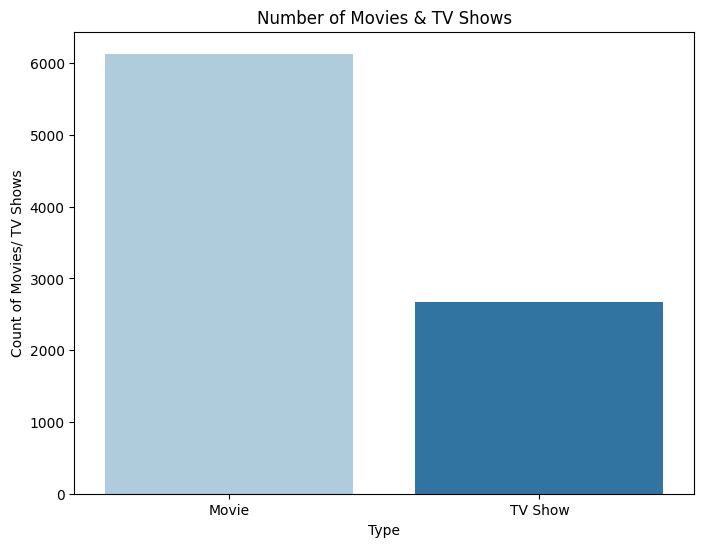

In [58]:
plt.figure(figsize = (8, 6))
sns.barplot(data = unique_movies_and_tv_shows_counts_df, x = "type", y = "title_count", palette = "Paired") #palette='rainbow'
plt.xlabel("Type")
plt.ylabel("Count of Movies/ TV Shows")
plt.title("Number of Movies & TV Shows")
plt.show()

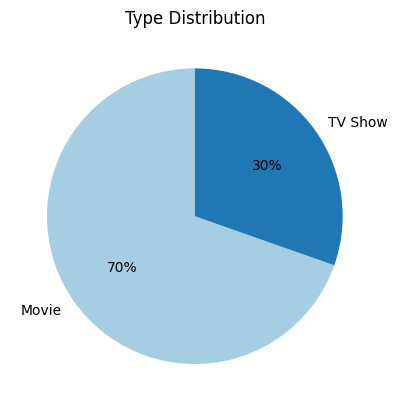

In [59]:
palette_color = sns.color_palette("Paired")
plt.pie(unique_movies_and_tv_shows_counts_df["title_count"], labels = unique_movies_and_tv_shows_counts_df["type"], autopct="%1.f%%", startangle=90, colors = palette_color)
plt.title("Type Distribution")
plt.show()

<font color = #F06201>**Insights :**

> <font color = 3b486a>**Total Number of Movies: 6131 & Total Number of TV Shows: 2676**

><font color = 3b486a>**It suggests that there are more movies around 70% compared to TV show which only accounts 30% in your dataset.**

---

<font color = 3b486a>**Question: 3**

---

> <font color = 3b486a>**Does Netflix has more focus on TV Shows than movies over the years?**

In [60]:
movies_and_tv_shows_over_the_year_df = df.groupby(["year_added", "type"])["title"].nunique().reset_index(name = "title_count")
movies_and_tv_shows_over_the_year_df

,year_added,type,title_count
0,2008,Movie,1
1,2008,TV Show,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,13
5,2012,Movie,3
6,2013,Movie,6
7,2013,TV Show,5
8,2014,Movie,19
9,2014,TV Show,5


In [61]:
total_movies_and_tv_shows_over_the_year_df = df.groupby("year_added")["title"].nunique().reset_index(name = "title_count")
total_movies_and_tv_shows_over_the_year_df

,year_added,title_count
0,2008,2
1,2009,2
2,2010,1
3,2011,13
4,2012,3
5,2013,11
6,2014,24
7,2015,82
8,2016,432
9,2017,1189


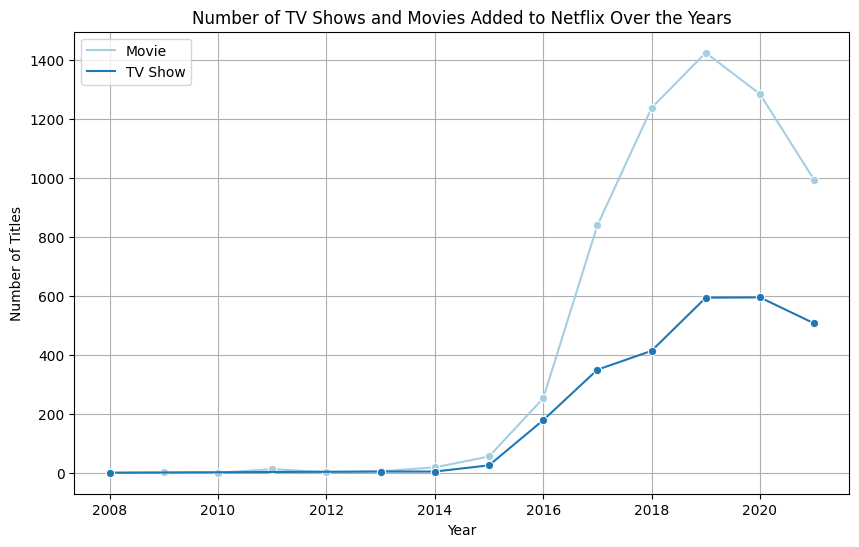

In [62]:
plt.figure(figsize=(10,6))
sns.lineplot(data = movies_and_tv_shows_over_the_year_df, x = "year_added", y = "title_count", hue = "type", palette = "Paired", marker = "o")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.title("Number of TV Shows and Movies Added to Netflix Over the Years")
plt.legend()
plt.grid(True)
plt.show()

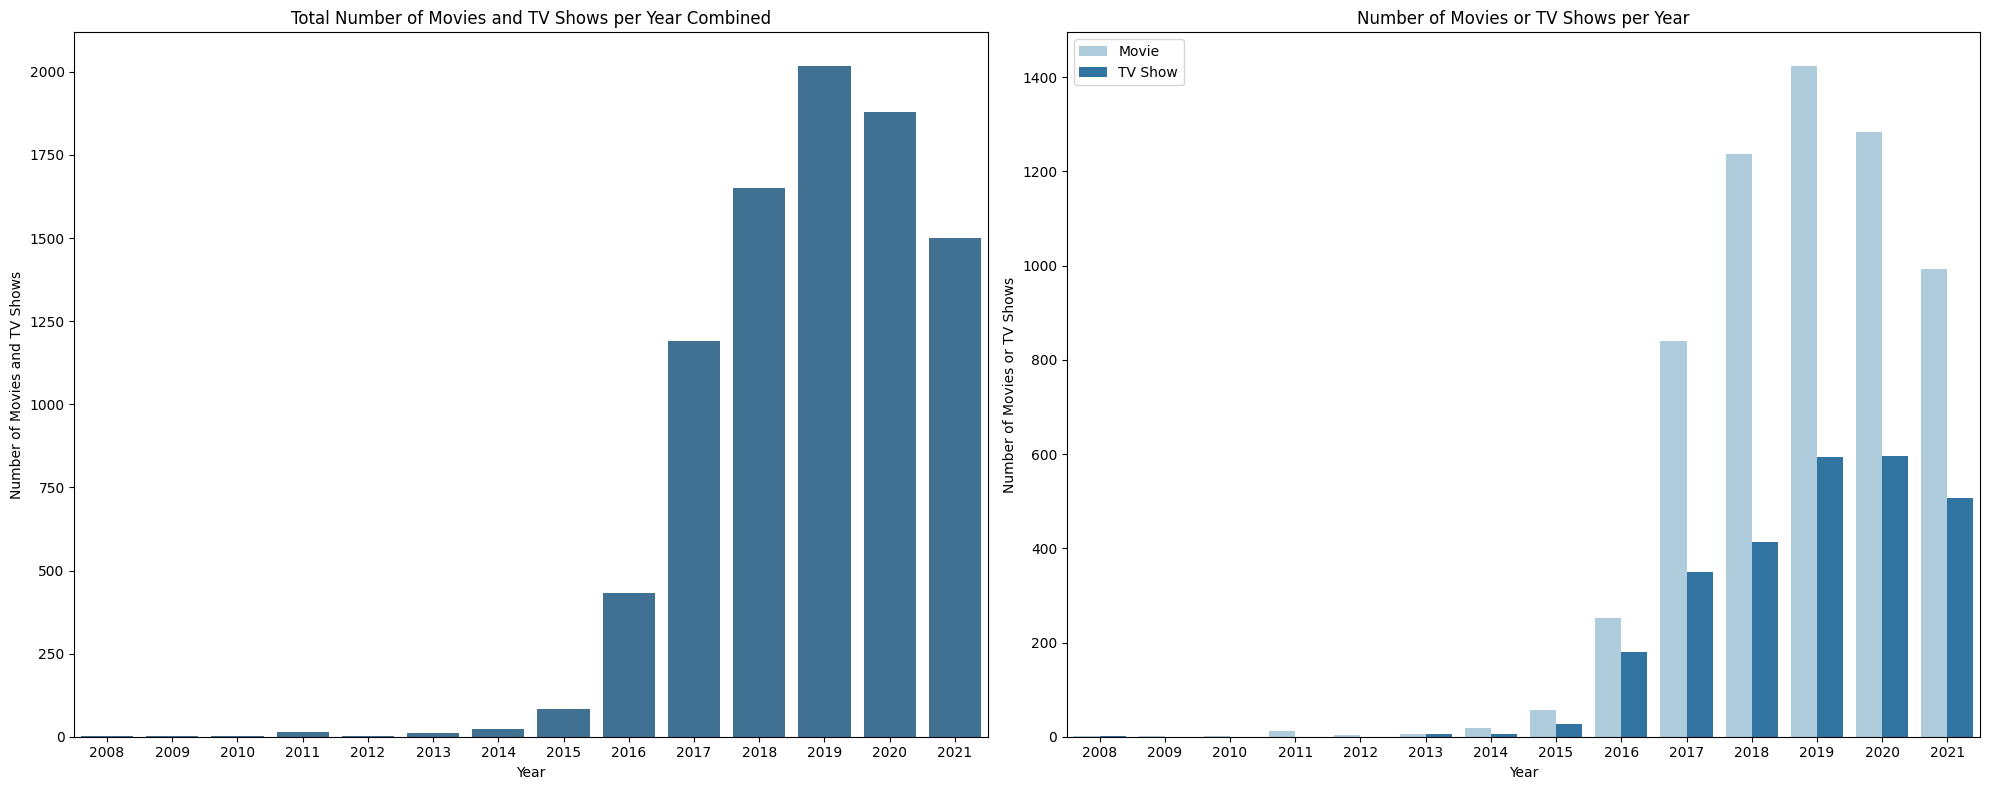

In [63]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("Total Number of Movies and TV Shows per Year Combined")
sns.barplot(data = total_movies_and_tv_shows_over_the_year_df, x = "year_added", y = "title_count", color = "#3274A1")
plt.xlabel("Year")
plt.ylabel("Number of Movies and TV Shows")

plt.subplot(1,2,2)
plt.title("Number of Movies or TV Shows per Year")
sns.barplot(data = movies_and_tv_shows_over_the_year_df, x = "year_added", y = "title_count", hue = "type", palette = "Paired")
plt.legend(loc = "upper left")
plt.xlabel("Year")
plt.ylabel("Number of Movies or TV Shows")

plt.tight_layout()
plt.show()

In [64]:
count_2016_tv_show = 179
count_2020_tv_show = 595

count_2016_movie = 253
count_2020_movie = 1284

percentage_increase_tv = ((count_2020_tv_show - count_2016_tv_show) / count_2016_tv_show) * 100
percentage_increase_movies = ((count_2020_movie - count_2016_movie) / count_2016_movie) * 100

print(f"Percentage Increase in TV Shows: {percentage_increase_tv:.2f}%")
print(f"Percentage Increase in Movies: {percentage_increase_movies:.2f}%")

Percentage Increase in TV Shows: 232.40%
Percentage Increase in Movies: 407.51%


<font color = #F06201>**Insights :**

> <font color = 3b486a>**After 2016, witnessed a substantial rise in TV show & movies added on Netflix.**

> <font color = 3b486a>**In 2019, Highest number of Movies & TV Shows added combined.**

> <font color = 3b486a>**The period from 2016 to 2020 saw remarkable growth in both TV shows and movies available on Netflix. The percentage increase in the number of TV shows was substantial, with a growth rate of 232.40%. Similarly, the number of movies increased significantly, experiencing a growth rate of 407.51%.**


    Note: Here, we are focusing on analyzing growth between 2016 and 2020, as complete data for the year 2021 is not available.



<font color = #F06201>**Recommendation :**
><font color = 3b486a>**Given the notable growth in both TV shows and movies, it's essential for Netflix to maintain a balance between the two formats.**

---

<font color = 3b486a>**Question: 4**

---

> <font color = 3b486a>**Movies & TV Shows added by Netflix per Month**

In [65]:
movie_tv_show_by_month = df.groupby(["month_added", "type"])["title"].nunique().reset_index(name = "title_count").sort_values(by = "month_added")

In [66]:
month_number_mapping = {
    "January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6,
    "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12
}

In [67]:
movie_tv_show_by_month["month_number"] = movie_tv_show_by_month["month_added"].map(month_number_mapping)

In [68]:
movie_tv_show_by_month = movie_tv_show_by_month.sort_values(by = "month_number")

In [69]:
movie_tv_show_by_month

,month_added,type,title_count,month_number
8,January,Movie,546,1
9,January,TV Show,192,1
6,February,Movie,382,2
7,February,TV Show,181,2
15,March,TV Show,213,3
14,March,Movie,529,3
0,April,Movie,550,4
1,April,TV Show,215,4
17,May,TV Show,193,5
16,May,Movie,439,5


In [70]:
movie_tv_show_by_month_combined = df.groupby("month_added")["title"].nunique().reset_index(name = "title_count")

In [71]:
movie_tv_show_by_month_combined["month_number"] = movie_tv_show_by_month_combined["month_added"].map(month_number_mapping)

In [72]:
movie_tv_show_by_month_combined = movie_tv_show_by_month_combined.sort_values(by = "month_number")

In [73]:
movie_tv_show_by_month_combined

,month_added,title_count,month_number
4,January,738,1
3,February,563,2
7,March,742,3
0,April,765,4
8,May,632,5
6,June,728,6
5,July,831,7
1,August,756,8
11,September,773,9
10,October,760,10


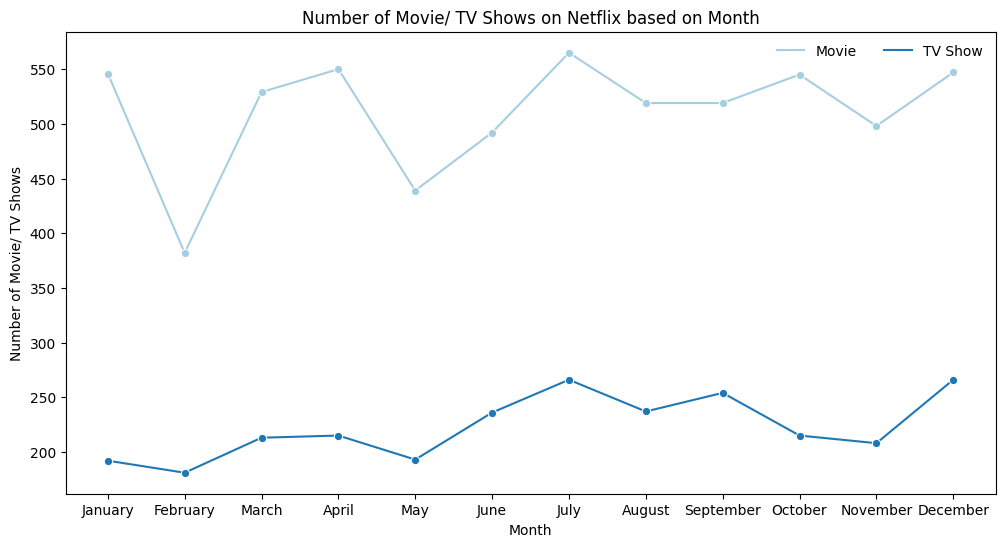

In [74]:
plt.figure(figsize = (12,6))
sns.lineplot(data = movie_tv_show_by_month, x = "month_added", y = "title_count", hue = "type", palette = "Paired", marker = 'o')
plt.xlabel("Month")
plt.ylabel("Number of Movie/ TV Shows")
plt.title("Number of Movie/ TV Shows on Netflix based on Month")
plt.legend(ncol = 2, frameon = False)
plt.show()

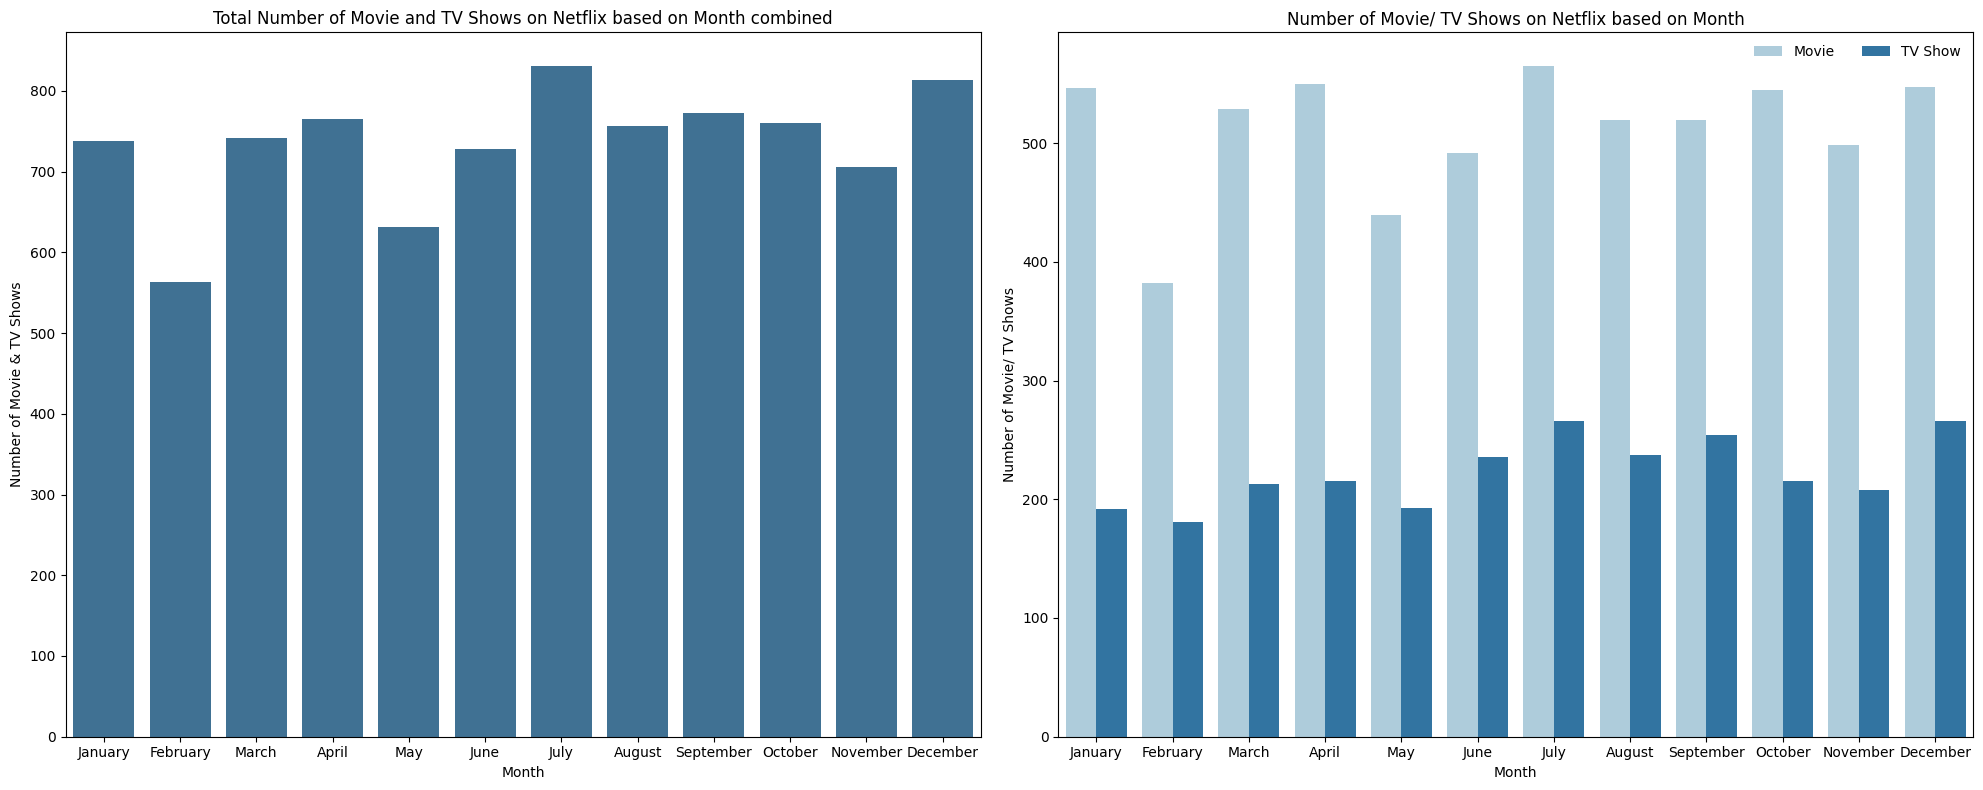

In [75]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.barplot(data = movie_tv_show_by_month_combined, x = "month_added", y = "title_count", color = "#3274A1")
plt.xlabel("Month")
plt.ylabel("Number of Movie & TV Shows")
plt.title("Total Number of Movie and TV Shows on Netflix based on Month combined")

plt.subplot(1,2,2)
sns.barplot(data = movie_tv_show_by_month, x = "month_added", y = "title_count", hue = "type", palette = "Paired")
plt.xlabel("Month")
plt.ylabel("Number of Movie/ TV Shows")
plt.title("Number of Movie/ TV Shows on Netflix based on Month")
plt.legend(ncol = 2, frameon = False)

plt.tight_layout()
plt.show()

<font color = #F06201>**Insights :**

> <font color = 3b486a>**Certain months, such as July and December, consistently witness higher title additions, suggesting strategic content releases during holiday seasons and breaks.**

> <font color = 3b486a>**TV shows and movies are added in varying quantities each month, reflecting a balanced approach to content diversity.**

<font color = #F06201>**Recommendation :**
><font color = 3b486a>**Track viewer engagement metrics for different types of content during various months. This can help identify viewer preferences and trends associated with specific times of the year.**

> <font color = 3b486a>**Maintain a balanced mix of TV shows and movies each month to cater to different viewer preferences and maintain engagement levels.**

> <font color = 3b486a>**Collect viewer feedback on content preferences and use this information to shape the content release strategy, ensuring that it aligns with user expectations.**

---

<font color = 3b486a>**Question: 5**

---

> <font color = 3b486a>**Distribution of TV Shows and Movies added in different years and months - Visualizing it with Heatmap**

In [76]:
heatmap_df = df.pivot_table(index="month_added", columns="year_added", values="title", aggfunc="nunique", fill_value=0)

In [77]:
month_number_mapping = {
    "January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6,
    "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12
}

In [78]:
heatmap_df["month_number"] = heatmap_df.index.map(month_number_mapping)

In [79]:
heatmap_df = heatmap_df.sort_values(by = "month_number")

In [80]:
heatmap_df.drop(columns = "month_number", inplace = True)

In [81]:
heatmap_df

year_added,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month_added,,,,,,,,,,,,,,
January,1,0,0,0,0,0,2,1,43,72,129,153,205,132
February,1,0,0,0,1,0,2,4,15,82,87,148,114,109
March,0,0,0,0,0,1,0,5,17,125,173,172,137,112
April,0,0,0,0,0,0,2,5,22,93,115,163,177,188
May,0,1,0,1,0,0,0,6,13,86,97,139,157,132
June,0,0,0,0,0,0,1,6,18,94,78,168,156,207
July,0,0,0,0,0,0,1,7,31,79,152,158,146,257
August,0,0,0,0,0,1,1,2,34,116,164,131,129,178
September,0,0,0,1,0,2,1,7,48,113,125,123,168,185


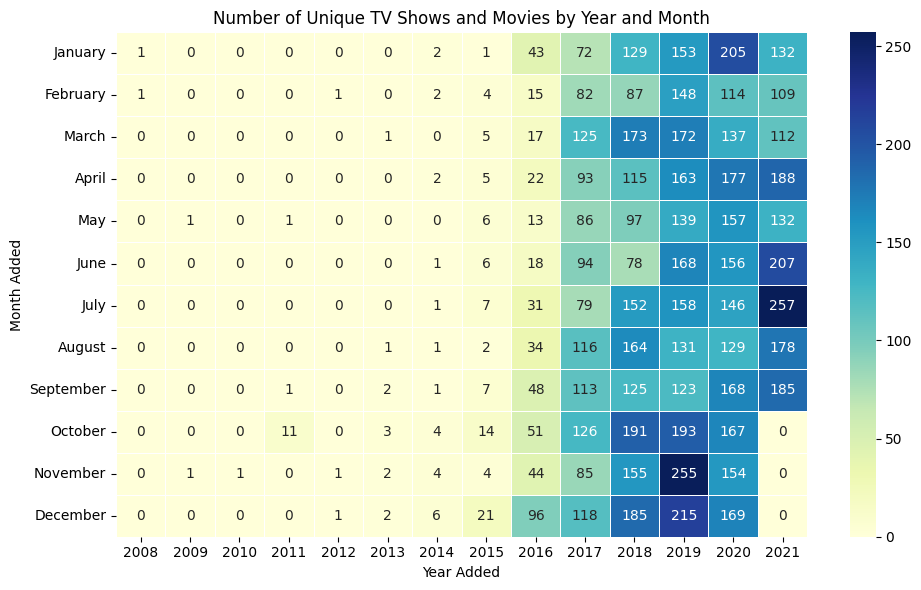

In [82]:
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_df, cmap="YlGnBu", annot=True, fmt="d", linewidths=0.5)
plt.title("Number of Unique TV Shows and Movies by Year and Month")
plt.xlabel("Year Added")
plt.ylabel("Month Added")
plt.tight_layout()
plt.show()

<font color = #F06201>**Insights :**

> <font color = 3b486a>**We can see that `Nov'2019` and `Jul'2021` have highest number of Movies and TV Shows added.**

---

<font color = 3b486a>**Question: 6**

---

> <font color = 3b486a>**On which Day of the Month, highest number of Movies & TV Shows added?**

In [83]:
movie_tv_show_by_day = df.groupby([df["date_added"].dt.day])["title"].nunique().reset_index(name = "count")
movie_tv_show_by_day

,date_added,count
0,1,2218
1,2,325
2,3,151
3,4,175
4,5,231
5,6,210
6,7,194
7,8,201
8,9,148
9,10,214


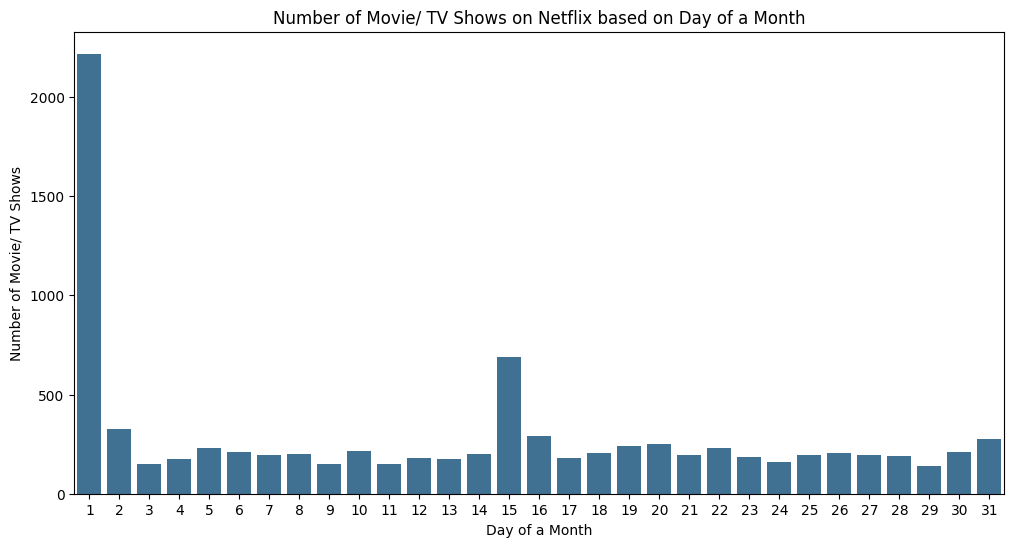

In [84]:
plt.figure(figsize = (12,6))
sns.barplot(data = movie_tv_show_by_day, x = "date_added", y = "count", color = "#3274A1")
plt.xlabel("Day of a Month")
plt.ylabel("Number of Movie/ TV Shows")
plt.title("Number of Movie/ TV Shows on Netflix based on Day of a Month")
plt.show()

<font color = #F06201>**Insights :**

> <font color = 3b486a>**The 1st of the month has consistently witness higher content additions, possibly due to strategic planning.**

> <font color = 3b486a>**The 15th of the month stands out with a substantial spike in content additions, suggesting a potential focus on this day for notable releases.**

<font color = #F06201>**Recommendation :**
><font color = 3b486a>**Consider focusing on the initial days, mid-month peak, and select days that show engagement spikes.**

> <font color = 3b486a>**Leverage viewer feedback and engagement data to guide content release decisions. Understand which types of content resonate with viewers on different days.**

---

<font color = 3b486a>**Question: 7**

---

> <font color = 3b486a>**On which Day of the Week, highest number of Movies & TV Shows added?**

In [85]:
movie_tv_show_by_week = df.groupby([df["date_added"].dt.day_name(), "type"])["title"].nunique().sort_values().reset_index()

In [86]:
week_day_mapping = {
    "Monday": 0, "Tuesday": 1, "Wednesday": 2, "Thursday": 3, "Friday": 4, "Saturday": 5, "Sunday": 6
}

In [87]:
movie_tv_show_by_week["day_of_week"] = movie_tv_show_by_week["date_added"].map(week_day_mapping)

In [88]:
movie_tv_show_by_week = movie_tv_show_by_week.sort_values(by = ["day_of_week", "type"])
movie_tv_show_by_week

,date_added,type,title,day_of_week
8,Monday,Movie,628,0
1,Monday,TV Show,224,0
9,Tuesday,Movie,852,1
4,Tuesday,TV Show,347,1
10,Wednesday,Movie,906,2
5,Wednesday,TV Show,384,2
12,Thursday,Movie,1053,3
3,Thursday,TV Show,343,3
13,Friday,Movie,1566,4
11,Friday,TV Show,936,4


In [89]:
movie_tv_show_by_week_combined = df.groupby([df["date_added"].dt.day_name()])["title"].nunique().sort_values().reset_index()

In [90]:
movie_tv_show_by_week_combined["day_of_week"] = movie_tv_show_by_week_combined["date_added"].map(week_day_mapping)

In [91]:
movie_tv_show_by_week_combined = movie_tv_show_by_week_combined.sort_values(by = "day_of_week")
movie_tv_show_by_week_combined

,date_added,title,day_of_week
2,Monday,852,0
3,Tuesday,1199,1
4,Wednesday,1290,2
5,Thursday,1396,3
6,Friday,2502,4
1,Saturday,816,5
0,Sunday,752,6


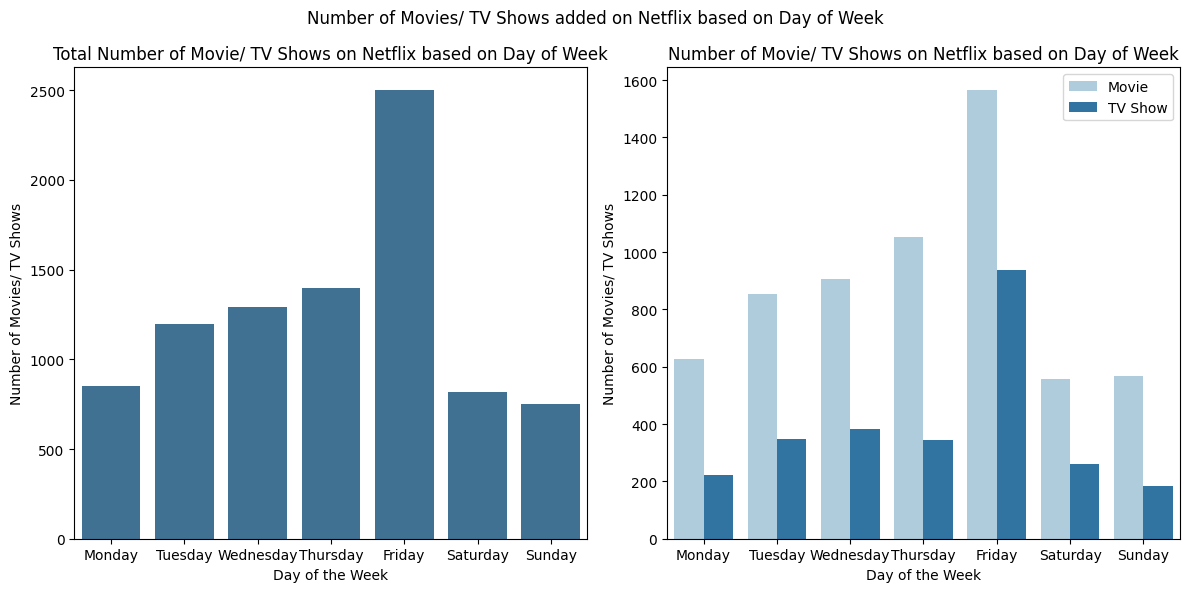

In [92]:
plt.figure(figsize = (12, 6))
plt.suptitle("Number of Movies/ TV Shows added on Netflix based on Day of Week")

plt.subplot(1, 2, 1)
sns.barplot(data = movie_tv_show_by_week_combined, x = "date_added", y = "title", color = "#3274A1")
plt.title("Total Number of Movie/ TV Shows on Netflix based on Day of Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Movies/ TV Shows")


plt.subplot(1, 2, 2)
sns.barplot(data = movie_tv_show_by_week, x = "date_added", y = "title", hue = "type", palette = "Paired")
plt.title("Number of Movie/ TV Shows on Netflix based on Day of Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Movies/ TV Shows")
plt.legend()

plt.tight_layout()
plt.show()

<font color = #F06201>**Insights :**

> <font color = 3b486a>**Fridays have highest content additions, possibly to cater to weekend viewership.**

> <font color = 3b486a>**Wednesday and Thursday also witness substantial content additions, suggesting that viewers are engaged during the mid-week period.**

> <font color = 3b486a>**There's a lower count of content additions on Saturday and Sunday, which might be due to viewers' engagement in other activities during the weekend.**

<font color = #F06201>**Recommendation :**
><font color = 3b486a>**As Fridays exhibit the highest engagement, consider scheduling significant releases, new seasons, or popular content on this day to capture the attention of a larger audience.**

> <font color = 3b486a>**Leverage the engagement observed on Wednesdays and Thursdays by running promotional campaigns, thematic releases, or viewer engagement activities during this period.**

> <font color = 3b486a>**Continuously analyze viewer engagement metrics to understand why certain days have higher engagement. Use viewer feedback to align content releases with their preferences.**

---

<font color = 3b486a>**Question: 8**

---

> <font color = 3b486a>**Top - 10 Countries in Content Creation Movies & TV Shows**

In [93]:
top_10_countries = (df[df["country"] != "Unknown"]
                    .groupby("country")["title"]
                    .nunique()
                    .nlargest(10)
                    .reset_index(name="count"))

In [94]:
top_10_countries

,country,count
0,United States,3797
1,India,1136
2,United Kingdom,822
3,Canada,471
4,France,400
5,Japan,353
6,South Korea,258
7,Spain,244
8,Germany,230
9,Mexico,182


In [95]:
country_type_df = df[df["country"] != "Unknown"].groupby(["country", "type"])["title"].nunique().sort_values(ascending = False).reset_index(name = "count")
country_type_df

,country,type,count
0,United States,Movie,2800
1,India,Movie,1036
2,United States,TV Show,997
3,United Kingdom,Movie,542
4,Canada,Movie,328
...,...,...,...
185,Cyprus,TV Show,1
186,Sri Lanka,Movie,1
187,Sudan,Movie,1
188,Cuba,TV Show,1


In [96]:
valid_countries = top_10_countries["country"]
valid_countries

0     United States
1             India
2    United Kingdom
3            Canada
4            France
5             Japan
6       South Korea
7             Spain
8           Germany
9            Mexico
Name: country, dtype: object

In [97]:
country_type_filtered_df = country_type_df[country_type_df["country"].isin(valid_countries)]
country_type_filtered_df

,country,type,count
0,United States,Movie,2800
1,India,Movie,1036
2,United States,TV Show,997
3,United Kingdom,Movie,542
4,Canada,Movie,328
5,France,Movie,305
6,United Kingdom,TV Show,280
7,Japan,TV Show,226
8,South Korea,TV Show,195
9,Germany,Movie,183


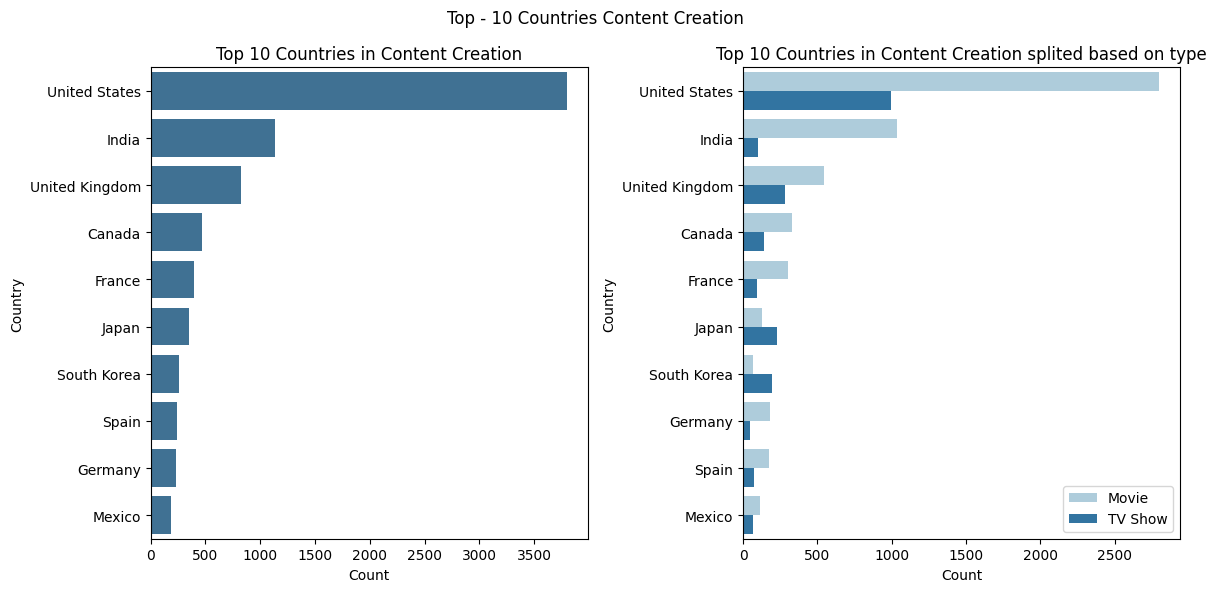

In [98]:
plt.figure(figsize = (12, 6))
plt.suptitle("Top - 10 Countries Content Creation")

plt.subplot(1, 2, 1)
plt.title("Top 10 Countries in Content Creation")
sns.barplot(data = top_10_countries, x = "count", y = "country", color = "#3274A1")
plt.xlabel("Count")
plt.ylabel("Country")

plt.subplot(1, 2, 2)
plt.title("Top 10 Countries in Content Creation splited based on type")
sns.barplot(data = country_type_filtered_df, x = "count", y = "country", hue = "type",  palette="Paired")
plt.xlabel("Count")
plt.ylabel("Country")
plt.legend()

plt.tight_layout()
plt.show()

<font color = #F06201>**Insights :**

> <font color = 3b486a>**The United States holds the highest count of movie additions, followed by TV shows, indicating a strong focus on American content.**

> <font color = 3b486a>**India ranks second in the number of movies added, showcasing a significant contribution to the platform's content offerings.**

> <font color = 3b486a>**Japan & South Korea have higher contribution in TV Shows compared to their Movies.**

<font color = #F06201>**Recommendation :**
><font color = 3b486a>**Invest in dubbing, subtitling, and localized content to appeal to international viewers and improve engagement.**

> <font color = 3b486a>**Leverage the dominance of U.S. and Indian content to cater to a global audience while also curating content that resonates with regional preferences.**

> <font color = 3b486a>**Utilize AI-driven recommendation algorithms to offer viewers content from their country of interest, enhancing personalization and engagement.**

---

<font color = 3b486a>**Question: 9**

---

> <font color = 3b486a>**Top - 10 Directors in Content Creation Movies & TV Shows**

In [99]:
directors_df = df[df["director"] != "Unknown Director"].groupby("director")["title"].nunique().nlargest(10).reset_index(name = "count")
directors_df

,director,count
0,Rajiv Chilaka,22
1,Jan Suter,21
2,Raúl Campos,19
3,Marcus Raboy,16
4,Suhas Kadav,16
5,Jay Karas,15
6,Cathy Garcia-Molina,13
7,Jay Chapman,12
8,Martin Scorsese,12
9,Youssef Chahine,12


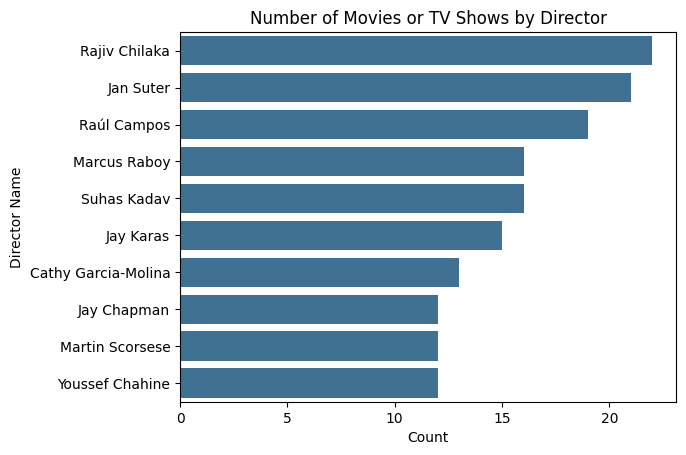

In [100]:
plt.title("Number of Movies or TV Shows by Director")
sns.barplot(data = directors_df, x = "count", y = "director", color = "#3274A1")
plt.xlabel("Count")
plt.ylabel("Director Name")
plt.show()

<font color = #F06201>**Insights :**

> <font color = 3b486a>**Rajiv Chilaka, Jan Suter, and Raúl Campos are the top - 3 directors in Content Contribution**

<font color = #F06201>**Recommendation :**
><font color = 3b486a>**Create special promotions or sections that highlight the work of these prolific directors, attracting viewers who appreciate their style.**

> <font color = 3b486a>**Foster ongoing collaborations with these directors to create exclusive and engaging content for the platform.**

> <font color = 3b486a>**Identify emerging directors with promising work and offer them opportunities to contribute fresh and unique content.**

> <font color = 3b486a>**Utilize viewer ratings, reviews, and preferences to understand how titles by different directors resonate with the audience. This can guide future content acquisitions.**

---

<font color = 3b486a>**Question: 10**

---

> <font color = 3b486a>**Top - 10 Directors in Content Creation which directed both Movies & TV Shows**

In [101]:
movie_director = df[df["type"] == "Movie"]["director"].unique()
tv_show_director = df[df["type"] == "TV Show"]["director"].unique()

In [102]:
director_in_both = set(movie_director) & set(tv_show_director)

In [103]:
director_in_both = list(director_in_both)

In [104]:
both_type_director_df = df[df["director"].isin(director_in_both)]

In [105]:
both_type_director_df_filtered = both_type_director_df[both_type_director_df["director"] != "Unknown Director"].groupby(["director", "type"])["title"].nunique().reset_index(name = "title_count")
both_type_director_df_filtered

,director,type,title_count
0,Abhishek Chaubey,Movie,4
1,Abhishek Chaubey,TV Show,1
2,Alastair Fothergill,Movie,1
3,Alastair Fothergill,TV Show,3
4,Alban Teurlai,Movie,1
...,...,...,...
161,Vikramaditya Motwane,TV Show,1
162,Weica Wang,Movie,1
163,Weica Wang,TV Show,1
164,Ziad Doueiri,Movie,1


In [106]:
total_both_type_director_df_filtered = both_type_director_df[both_type_director_df["director"] != "Unknown Director"].groupby("director")["title"].nunique().nlargest(10).reset_index(name = "title_count")
total_both_type_director_df_filtered

,director,title_count
0,Marcus Raboy,16
1,Anurag Kashyap,9
2,Quentin Tarantino,8
3,Ryan Polito,8
4,Priyadarshan,7
5,Michael Simon,6
6,Abhishek Chaubey,5
7,Joe Berlinger,5
8,John Paul Tremblay,5
9,Ken Burns,5


In [107]:
valid_directors_both = total_both_type_director_df_filtered["director"]
valid_directors_both

0          Marcus Raboy
1        Anurag Kashyap
2     Quentin Tarantino
3           Ryan Polito
4          Priyadarshan
5         Michael Simon
6      Abhishek Chaubey
7         Joe Berlinger
8    John Paul Tremblay
9             Ken Burns
Name: director, dtype: object

In [108]:
both_type_director_df_filtered = both_type_director_df_filtered[both_type_director_df_filtered["director"].isin(valid_directors_both)]
both_type_director_df_filtered = both_type_director_df_filtered.sort_values(by = "title_count", ascending = False)
both_type_director_df_filtered

,director,type,title_count
92,Marcus Raboy,Movie,15
10,Anurag Kashyap,Movie,8
132,Ryan Polito,Movie,7
120,Quentin Tarantino,Movie,7
118,Priyadarshan,Movie,6
100,Michael Simon,Movie,5
0,Abhishek Chaubey,Movie,4
66,John Paul Tremblay,Movie,4
79,Ken Burns,TV Show,3
60,Joe Berlinger,Movie,3


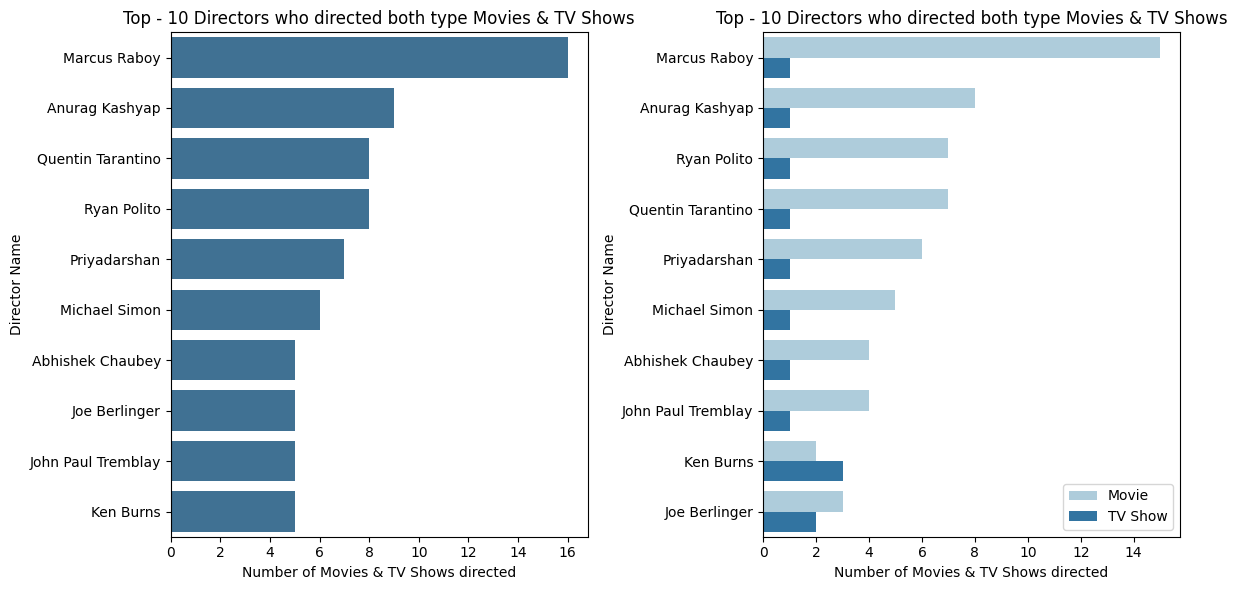

In [109]:
plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
sns.barplot(data = total_both_type_director_df_filtered, x = "title_count", y = "director", color = "#3274A1")
plt.title("Top - 10 Directors who directed both type Movies & TV Shows")
plt.xlabel("Number of Movies & TV Shows directed")
plt.ylabel("Director Name")

plt.subplot(1, 2, 2)
sns.barplot(data = both_type_director_df_filtered, x = "title_count", y = "director", hue = "type",palette = "Paired")
plt.title("Top - 10 Directors who directed both type Movies & TV Shows")
plt.xlabel("Number of Movies & TV Shows directed")
plt.ylabel("Director Name")
plt.legend()

plt.tight_layout()
plt.show()

<font color = #F06201>**Insights :**

> <font color = 3b486a>**All the Directors who are in Top - 10 list have directed atleast 1 TV Show.**

> <font color = 3b486a>**Number of Movies are directed more compared to TV Shows among these Directors but "Ken Burns" directed more TV Shows compared to Movies.**

<font color = #F06201>**Recommendation :**
><font color = 3b486a>**Create special promotions or sections that highlight the work of these prolific directors who directed both Movies & TV Shows, attracting viewers who appreciate their style.**

> <font color = 3b486a>**Foster ongoing collaborations with these directors to create exclusive and engaging content for the platform.**

> <font color = 3b486a>**Identify emerging directors with promising work and offer them opportunities to contribute fresh and unique content.**

> <font color = 3b486a>**Utilize viewer ratings, reviews, and preferences to understand how titles by different directors resonate with the audience. This can guide future content acquisitions.**

---

<font color = 3b486a>**Question: 11**

---

> <font color = 3b486a>**Top - 10 Actors who did highest number of Movies & TV Shows**

In [110]:
actors_df = df[df["actor"] != "Unknown Actor"].groupby("actor")["title"].nunique().nlargest(10).reset_index(name = "count")
actors_df

,actor,count
0,Anupam Kher,43
1,Shah Rukh Khan,35
2,Julie Tejwani,33
3,Naseeruddin Shah,32
4,Takahiro Sakurai,32
5,Rupa Bhimani,31
6,Akshay Kumar,30
7,Om Puri,30
8,Yuki Kaji,29
9,Amitabh Bachchan,28


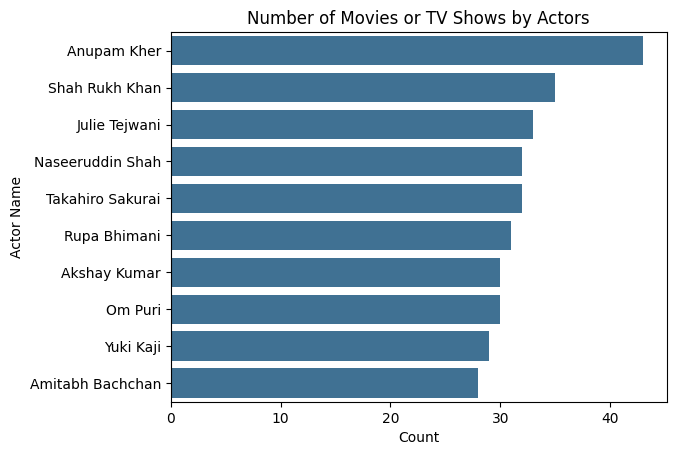

In [111]:
plt.title("Number of Movies or TV Shows by Actors")
sns.barplot(data = actors_df, x = "count", y = "actor", color = "#3274A1")
plt.xlabel("Count")
plt.ylabel("Actor Name")
plt.show()

<font color = #F06201>**Insights :**

> <font color = 3b486a>**The list includes actors from various countries and backgrounds, highlighting a diverse range of talent.**

> <font color = 3b486a>**Several actors on the list, such as Anupam Kher, Akshay Kumar, and Amitabh Bachchan, are well-known and respected figures in the industry. Even they also have international fan base.**

<font color = #F06201>**Recommendation :**
><font color = 3b486a>**Create special collections or sections that showcase the diverse work of these actors, allowing viewers to explore their filmography easily.**

> <font color = 3b486a>**Collaborate with these actors to produce exclusive content or special projects that cater to their fan base and create a buzz.**

> <font color = 3b486a>**Balance offerings with actors from different countries and backgrounds to cater to a global audience.**

> <font color = 3b486a>**While leveraging the popularity of veteran actors, also scout for emerging talent to bring fresh faces and perspectives to the platform.**

---

<font color = 3b486a>**Question: 12**

---

> <font color = 3b486a>**Top - 10 Actors who worked in both Movies & TV Shows**

In [112]:
movie_actor = df[df["type"] == "Movie"]["actor"].unique()
tv_show_actor = df[df["type"] == "TV Show"]["actor"].unique()

In [113]:
actor_in_both = set(movie_actor) & set(tv_show_actor)

In [114]:
actor_in_both = list(actor_in_both)

In [115]:
both_type_actor_df = df[df["actor"].isin(actor_in_both)]

In [116]:
both_type_actor_df_filtered = both_type_actor_df[both_type_actor_df["actor"] != "Unknown Actor"].groupby(["actor", "type"])["title"].nunique().reset_index(name = "title_count")
both_type_actor_df_filtered

,actor,type,title_count
0,Jr.,Movie,1
1,Jr.,TV Show,1
2,'Najite Dede,Movie,1
3,'Najite Dede,TV Show,1
4,A.J. Cook,Movie,1
...,...,...,...
8745,İpek Bilgin,TV Show,2
8746,İştar Gökseven,Movie,2
8747,İştar Gökseven,TV Show,1
8748,Şükrü Özyıldız,Movie,1


In [117]:
total_both_type_actor_df_filtered = both_type_actor_df[both_type_actor_df["actor"] != "Unknown Actor"].groupby("actor")["title"].nunique().nlargest(10).reset_index(name = "title_count")
total_both_type_actor_df_filtered

,actor,title_count
0,Anupam Kher,43
1,Julie Tejwani,33
2,Takahiro Sakurai,32
3,Rupa Bhimani,31
4,Yuki Kaji,29
5,Rajesh Kava,26
6,Vincent Tong,26
7,Andrea Libman,25
8,John Cleese,24
9,Samuel L. Jackson,24


In [118]:
valid_actors_both = total_both_type_actor_df_filtered["actor"]
valid_actors_both

0          Anupam Kher
1        Julie Tejwani
2     Takahiro Sakurai
3         Rupa Bhimani
4            Yuki Kaji
5          Rajesh Kava
6         Vincent Tong
7        Andrea Libman
8          John Cleese
9    Samuel L. Jackson
Name: actor, dtype: object

In [119]:
both_type_actor_df_filtered = both_type_actor_df_filtered[both_type_actor_df_filtered["actor"].isin(valid_actors_both)]
both_type_actor_df_filtered = both_type_actor_df_filtered.sort_values(by = "title_count", ascending = False)
both_type_actor_df_filtered

,actor,type,title_count
692,Anupam Kher,Movie,42
4128,Julie Tejwani,Movie,28
7100,Rupa Bhimani,Movie,27
7881,Takahiro Sakurai,TV Show,25
7244,Samuel L. Jackson,Movie,22
6740,Rajesh Kava,Movie,21
8621,Yuki Kaji,TV Show,19
3842,John Cleese,Movie,19
506,Andrea Libman,Movie,17
8382,Vincent Tong,Movie,13


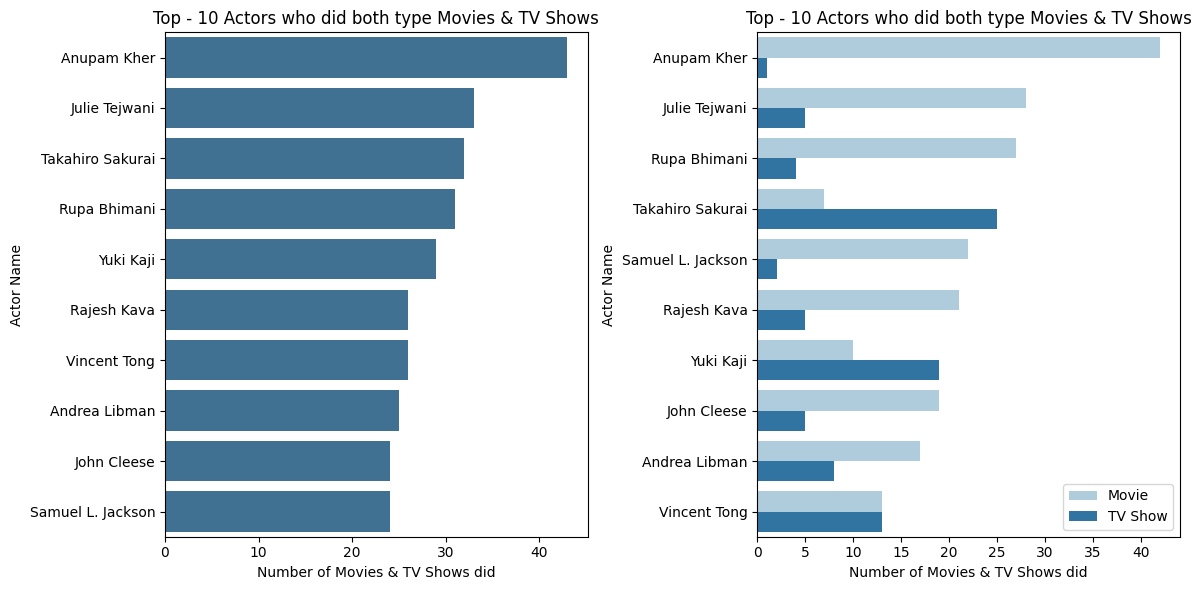

In [120]:
plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
sns.barplot(data = total_both_type_actor_df_filtered, x = "title_count", y = "actor", color = "#3274A1")
plt.title("Top - 10 Actors who did both type Movies & TV Shows")
plt.xlabel("Number of Movies & TV Shows did")
plt.ylabel("Actor Name")

plt.subplot(1, 2, 2)
sns.barplot(data = both_type_actor_df_filtered, x = "title_count", y = "actor", hue = "type",palette = "Paired")
plt.title("Top - 10 Actors who did both type Movies & TV Shows")
plt.xlabel("Number of Movies & TV Shows did")
plt.ylabel("Actor Name")
plt.legend()

plt.tight_layout()
plt.show()

<font color = #F06201>**Insights :**

> <font color = 3b486a>**Several actors have appeared in both movies and TV shows, showcasing their versatility and willingness to engage in different formats.**

> <font color = 3b486a>**Some actors, like Anupam Kher and Julie Tejwani, have appeared in a substantial number of both movies and TV shows.**

> <font color = 3b486a>**Actors like Takahiro Sakurai, Yuki Kaji and Vincent Tong have a higher count of TV shows, suggesting a potential preference for this format.**

<font color = #F06201>**Recommendation :**
><font color = 3b486a>**Promote actors who have engaged in both movies and TV shows, emphasizing their adaptability and commitment to diverse roles.**

> <font color = 3b486a>**Leverage actors who have appeared in both formats for cross-promotions, encouraging viewers of one format to explore the other.**

> <font color = 3b486a>**Encourage multi-format actors to collaborate on projects that cross the boundary between movies and TV shows, creating unique content.**

> <font color = 3b486a>**While leveraging the popularity of veteran actors, also scout for emerging talent to bring fresh faces and perspectives to the platform.**

---

<font color = 3b486a>**Question: 13**

---

> <font color = 3b486a>**Top - 10 Genres of Movies & TV Shows**

In [121]:
top_10_genre = df.groupby("genre")["title"].nunique().nlargest(10).reset_index(name = "title_count")
top_10_genre

,genre,title_count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


In [122]:
top_10_genre_separated_by_type = df.groupby(["genre", "type"])["title"].nunique().nlargest(10).reset_index(name = "title_count")
top_10_genre_separated_by_type

,genre,type,title_count
0,International Movies,Movie,2752
1,Dramas,Movie,2427
2,Comedies,Movie,1674
3,International TV Shows,TV Show,1351
4,Documentaries,Movie,869
5,Action & Adventure,Movie,859
6,TV Dramas,TV Show,763
7,Independent Movies,Movie,756
8,Children & Family Movies,Movie,641
9,Romantic Movies,Movie,616


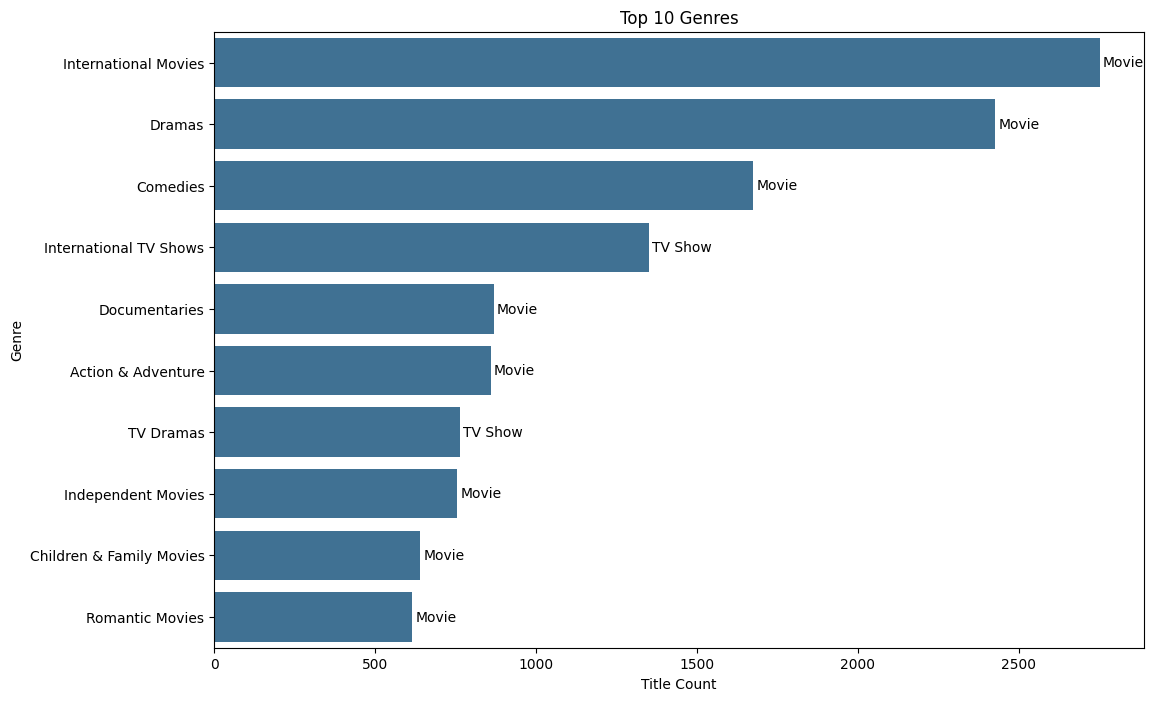

In [123]:
plt.figure(figsize = (12, 8))

ax = sns.barplot(data = top_10_genre_separated_by_type, x = "title_count", y = "genre", color = "#3274A1")

for idx, row in top_10_genre_separated_by_type.iterrows():
    ax.text(row["title_count"] + 10, idx, row["type"], color="black", va="center")

plt.xlabel("Title Count")
plt.ylabel("Genre")
plt.title("Top 10 Genres")
plt.show()

<font color = #F06201>**Insights :**

> <font color = 3b486a>**The top genres are dominated by movies, with "International Movies," "Dramas," and "Comedies" being the top three. These genres seem to have a wide audience appeal.**

> <font color = 3b486a>**The genres "International TV Shows" and "TV Dramas" are popular among TV shows, indicating that global and dramatic content is well-received by viewers.**

<font color = #F06201>**Recommendation :**
><font color = 3b486a>**Since "International Movies" and "International TV Shows" are popular, consider expanding the collection of content from various countries to cater to a global audience.**

> <font color = 3b486a>**Given the popularity of "Dramas" and "TV Dramas," creators can focus on producing high-quality dramatic series and movies to engage viewers.**

> <font color = 3b486a>**Keep a close watch on user feedback and engagement to identify emerging trends and preferences in genres. This can guide content creation and acquisition decisions.**

---

<font color = 3b486a>**Question: 14**

---

> <font color = 3b486a>**Top Directors and Their Most Common Genres**

In [124]:
df[df["director"] != "Unknown Director"].groupby(["director", "genre"])["title"].nunique().nlargest(10).reset_index(name = "title_count")

,director,genre,title_count
0,Rajiv Chilaka,Children & Family Movies,22
1,Jan Suter,Stand-Up Comedy,21
2,Raúl Campos,Stand-Up Comedy,19
3,Suhas Kadav,Children & Family Movies,16
4,Marcus Raboy,Stand-Up Comedy,15
5,Jay Karas,Stand-Up Comedy,14
6,Cathy Garcia-Molina,International Movies,13
7,Jay Chapman,Stand-Up Comedy,12
8,Youssef Chahine,Dramas,12
9,Youssef Chahine,International Movies,10


<font color = #F06201>**Insights :**

> <font color = 3b486a>**The table showcases a variety of directors who have excelled in different genres, highlighting their versatility and creative expertise.**

> <font color = 3b486a>**Rajiv Chilaka and Suhas Kadav's strength lies in "Children & Family Movies." Their contributions attract family audiences, making Netflix a go-to platform for family-friendly entertainment.**

> <font color = 3b486a>**Directors like Jan Suter, Raúl Campos, Marcus Raboy, and Jay Karas excel in the "Stand-Up Comedy" genre. Netflix can continue collaborating with these directors to produce engaging and humorous content that resonates with comedy enthusiasts.**

> <font color = 3b486a>**Youssef Chahine stands out for directing both "Dramas" and "International Movies," showcasing his ability to tackle a diverse range of cinematic themes.**

<font color = #F06201>**Recommendation :**
><font color = 3b486a>**Netflix can encourage directors to explore genres where they have shown proficiency. This collaboration can lead to high-quality and specialized content that attracts dedicated viewers.**

> <font color = 3b486a>**Leveraging the expertise of directors in stand-up comedy can lead to more comedy specials. These specials can be promoted as exclusive, must-watch content for users seeking laughter.**

> <font color = 3b486a>**Directors successful in the "Children & Family Movies" genre can collaborate on original series and movies tailored for young audiences. This approach can help Netflix establish itself as a trusted source of family entertainment.**

<font color = red>**Note :**
> <font color = 3b486a>**Please note that a single movie featuring an director may be categorized under different genres, leading to potential repetition in the count. Therefore, this analysis focuses solely on identifying the top directors and their respective genres to gain insights into their movie preferences and genre versatility.**

---

<font color = 3b486a>**Question: 15**

---

> <font color = 3b486a>**Top Actors and Their Most Common Genres**

In [125]:
df[df["actor"] != "Unknown Actor"].groupby(["actor", "genre"])["title"].nunique().nlargest(10).reset_index(name = "title_count")

,actor,genre,title_count
0,Anupam Kher,International Movies,38
1,Shah Rukh Khan,International Movies,32
2,Anupam Kher,Dramas,28
3,Naseeruddin Shah,Dramas,28
4,Shah Rukh Khan,Dramas,28
5,Akshay Kumar,International Movies,27
6,Naseeruddin Shah,International Movies,27
7,Om Puri,International Movies,27
8,Julie Tejwani,Children & Family Movies,26
9,Boman Irani,International Movies,25


<font color = #F06201>**Insights :**

> <font color = 3b486a>**Prominent actors like Anupam Kher, Shah Rukh Khan, Naseeruddin Shah, and Akshay Kumar have shown versatility by contributing to various genres. This suggests that Netflix benefits from their ability to engage audiences across different narrative styles.**

> <font color = 3b486a>**Julie Tejwani and Boman Irani's involvement in "Children & Family Movies" aligns with Netflix's efforts to offer family-friendly content. Collaborating with them can yield content that appeals to both children and adults.**

<font color = #F06201>**Recommendation :**
><font color = 3b486a>**Encourage actors to explore diverse genres, leveraging their versatility to create content that appeals to a wider range of viewers. Collaborations with actors known for multiple genres can result in compelling narratives.**

> <font color = 3b486a>**Continue partnering with actors who have a strong international fan base. Their involvement can enhance the platform's global reach and allow Netflix to offer content that resonates with various cultures.**

> <font color = 3b486a>**Encourage actors to contribute to the development of original stories. Their insights and ideas can lead to unique narratives that resonate with audiences.**

<font color = red>**Note :**
> <font color = 3b486a>**Please note that a single movie featuring an actor may be categorized under different genres, leading to potential repetition in the count. Therefore, this analysis focuses solely on identifying the top actors and their respective genres to gain insights into their movie preferences and genre versatility.**

---

<font color = 3b486a>**Question: 15**

---

> <font color = 3b486a>**Rating Analysis for Movies & TV Shows**

In [126]:
rating_df = df.groupby("rating")["title"].nunique().nlargest(10).reset_index(name = "title_count")
rating_df

,rating,title_count
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


In [127]:
rating_df_by_type = df.groupby(["rating", "type"])["title"].nunique().reset_index(name = "title_count")

In [128]:
valid_top_rating = rating_df["rating"]

In [129]:
rating_mapping = {"TV-MA" : 1, "TV-14" : 2, "TV-PG" : 3, "R" : 4, "PG-13" : 5, "TV-Y7" : 6, "TV-Y" : 7, "PG" : 8, "TV-G" : 9, "NR" : 10}

In [130]:
rating_df_by_type = rating_df_by_type[rating_df_by_type["rating"].isin(valid_top_rating)]
rating_df_by_type["map_number"] = rating_df_by_type["rating"].map(rating_mapping)
rating_df_by_type = rating_df_by_type.sort_values(by = "map_number")
rating_df_by_type

,rating,type,title_count,map_number
17,TV-MA,Movie,2062,1
18,TV-MA,TV Show,1145,1
13,TV-14,Movie,1427,2
14,TV-14,TV Show,733,2
19,TV-PG,Movie,540,3
20,TV-PG,TV Show,323,3
11,R,Movie,797,4
12,R,TV Show,2,4
10,PG-13,Movie,490,5
24,TV-Y7,TV Show,195,6


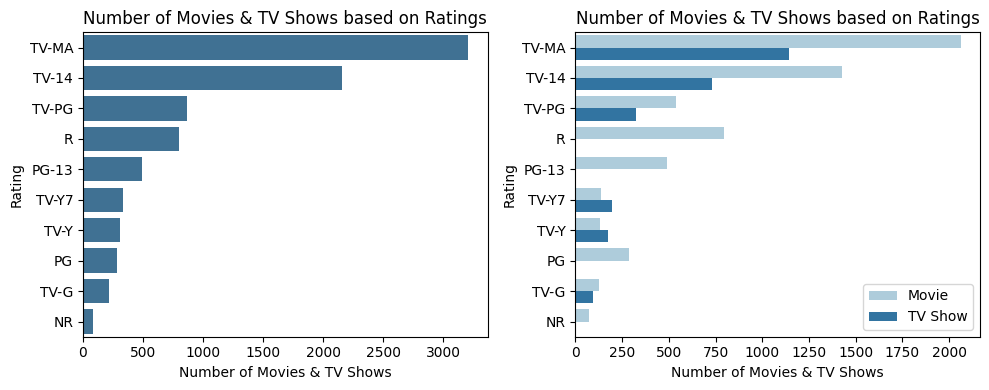

In [131]:
plt.figure(figsize = (10, 4))

plt.subplot(1, 2, 1)
sns.barplot(data = rating_df, x = "title_count", y = "rating", color = "#3274A1")
plt.xlabel("Number of Movies & TV Shows")
plt.ylabel("Rating")
plt.title("Number of Movies & TV Shows based on Ratings")

plt.subplot(1, 2, 2)
sns.barplot(data = rating_df_by_type, x = "title_count", y = "rating", hue = "type", palette = "Paired")
plt.xlabel("Number of Movies & TV Shows")
plt.ylabel("Rating")
plt.title("Number of Movies & TV Shows based on Ratings")
plt.legend(loc = "best")

plt.tight_layout()
plt.show()

<font color = #F06201>**Insights :**

> <font color = 3b486a>**The majority of content falls under the "TV-MA" (Mature Audience) and "TV-14" (Teens 14 and older) ratings, indicating that Netflix caters to viewers seeking more mature and diverse narratives.**

> <font color = 3b486a>**The presence of "TV-PG," "PG," "TV-Y7," and "TV-Y" ratings showcases Netflix's commitment to providing content suitable for a wide range of viewers, including families and younger audiences.**

> <font color = 3b486a>**We can observe that for ratings "R", "PG-13" and "PG", there are no TV Shows.**

<font color = #F06201>**Recommendation :**
><font color = 3b486a>**Continue to offer a diverse range of content across different ratings to cater to viewers of all age groups and preferences.**

> <font color = 3b486a>**Keep a balance between mature and family-friendly content, allowing viewers to find content that suits their mood and audience preferences.**

---

<font color = 3b486a>**Question: 16**

---

> <font color = 3b486a>**Duration Analysis for Movies & TV Shows**

In [132]:
def categorize_duration(x):
  if "Season" in x["duration"]:
    x["duration_category"] = x["duration"]
    # return x
  elif "min" in x["duration"]:
    minutes = int(x["duration"].split()[0])
    if minutes <= 30:
      x["duration_category"] = 'Short (<30 min)'
      # return x
    elif 30 < minutes <= 60:
      x["duration_category"] = 'Medium (30-60 min)'
      # return x
    elif 60 < minutes <= 120:
      x["duration_category"] = 'Long (1-2 hours)'
      # return x
    else:
      x["duration_category"] = 'Very Long (>2 hours)'
      # return x
  return x

In [ ]:
df = df.apply(categorize_duration, axis = 1)

In [ ]:
df.head()

In [ ]:
df["duration_category"].unique()

In [ ]:
duration_df = df.groupby("duration_category")["title"].nunique().nlargest(10).reset_index(name = "title_count")
duration_df

In [ ]:
plt.title("Title Counts by Duration Category")
sns.barplot(data = duration_df, x = "title_count", y = "duration_category", color = "#3274A1")
plt.xlabel("Count")
plt.ylabel("Duration Category")
plt.show()

<font color = #F06201>**Insights :**

> <font color = 3b486a>**The majority of content falls into the "Long (1-2 hours)" and "Very Long (>2 hours)" categories, indicating that viewers enjoy feature-length movies as a popular choice.**

> <font color = 3b486a>**The presence of content with "1 Season," "2 Seasons," and beyond indicates that TV shows with multiple seasons are also widely available and cater to binge-watching preferences.**

> <font color = 3b486a>**The platform offers content of different lengths, from "Short (<30 min)" episodes to "Medium (30-60 min)" episodes, providing options for viewers with varying time constraints.**

<font color = #F06201>**Recommendation :**
><font color = 3b486a>**Continue to maintain a balanced mix of content across various duration categories, allowing viewers to choose based on their available time and preferences.**

> <font color = 3b486a>**Invest in creating original series with multiple seasons to cater to binge-watchers and viewers who prefer serialized content.**

> <font color = 3b486a>**Leverage viewer data and feedback to understand which duration categories are most popular and tailor content acquisition and production strategies accordingly.**